In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

Data

In [9]:
data_path = 'australian.dat'

In [10]:
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
df = pd.read_csv(data_path, header=None, names=column_names, delim_whitespace=True)

In [11]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [12]:
df.shape

(690, 15)

In [17]:
df['Class'].value_counts()

,count
Class,
0,383
1,307


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  Class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


-> No missing values

In [23]:
#Data split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Decision Tree

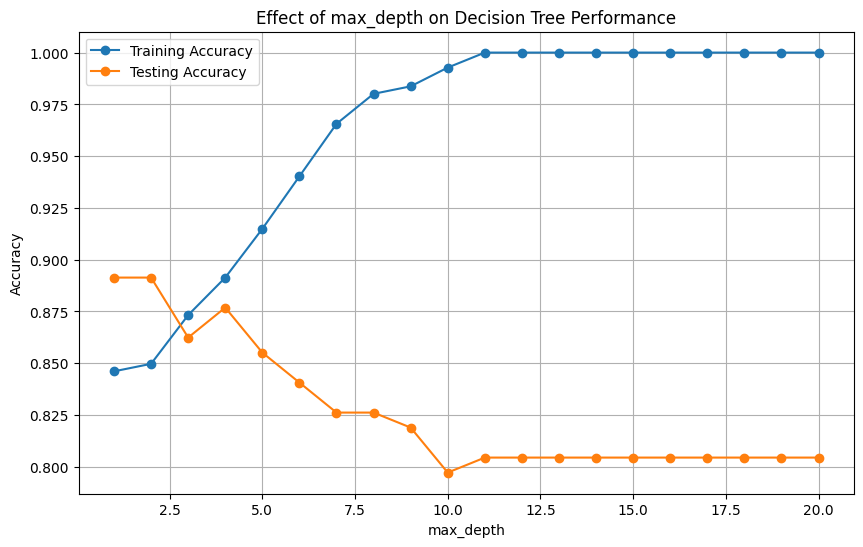

In [33]:
depths = range(1, 21)  # Test max_depth values from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt_model.fit(X_train, y_train)

    y_train_pred = dt_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict on test data
    y_test_pred = dt_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
param_grid = {
    'max_depth': range(1, 21),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

dt_model = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test accuracy with best parameters: {:.2f}".format(test_accuracy))

Best parameters found:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 7}
Best cross-validation score: 0.86
Test accuracy with best parameters: 0.85


Random Forest

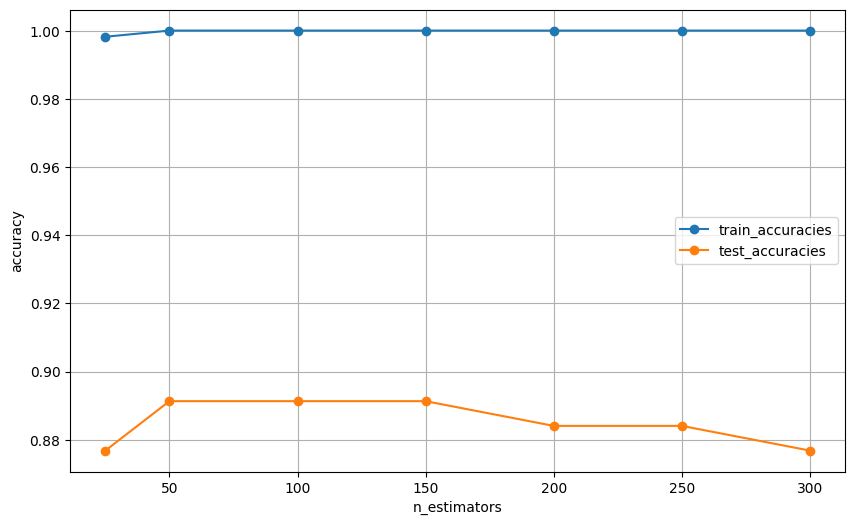

In [40]:
n_estimators = [25, 50, 100, 150, 200, 250, 300]
train_acc_rf = []
test_acc_rf = []

for n in n_estimators:
  rf_model = RandomForestClassifier(n_estimators= n, random_state = 0)
  rf_model.fit(X_train, y_train)

  y_train_pred_rf = rf_model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_pred_rf)
  train_acc_rf.append(train_acc)

  y_test_pred_rf = rf_model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_pred_rf)
  test_acc_rf.append(test_acc)
#plot the results
plt.figure(figsize = (10,6))
plt.plot(n_estimators, train_acc_rf, label = 'train_accuracies', marker ='o')
plt.plot(n_estimators, test_acc_rf, label = 'test_accuracies', marker ='o')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
}

rf_model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print(f"Best cross-validation score: {best_score:.4f}")

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.8750
Test accuracy with best parameters: 0.8696
